### **Capstone Project: E-commerce Customer Churn Prediction**

[E-commerce Customer Churn Data set](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves) 

### Business Problem Understanding:
## Context
In today's competitive e-commerce market, retaining customers is crucial for business success. An **e-commerce company** aims to understand and predict which customers are at risk of **churning**—that is, discontinuing their services or purchases. By identifying these customers early, the company can take targeted actions to retain them, such as offering promotions, improving customer service, or adjusting product offerings. Accurate prediction of churn can lead to higher customer retention, improved customer satisfaction, and ultimately, increased revenue.

## Problem Statement
The company wants to predict which customers are likely to churn in the near future based on historical data about their interactions, satisfaction, purchasing behavior, and demographics. The challenge is to develop a **predictive model** that can accurately identify these at-risk customers from a given set of features. The business needs this model to provide insights that can guide decision-making on marketing strategies, customer retention programs, and resource allocation.

## Target Variable: Churn

**Description**: The "Churn" column indicates whether a customer has churned (left the service) or not.
- **Churn = 1**: The customer has churned (left the service).
- **Churn = 0**: The customer has not churned (remained a customer).

This is a **binary classification problem**, where the goal is to predict the likelihood of a customer churning based on the provided features (e.g., satisfaction score, tenure, complaints, etc.).


## Goals
The primary goal of this project is to build a machine learning model that predicts customer churn based on available data. Specific goals include:
1. **Prediction**: Develop a model that can predict whether a customer will churn or not.
2. **Accuracy**: Ensure the model is highly accurate in distinguishing between customers who will churn and those who will not.
3. **Insights**: Identify the key factors that contribute to churn (e.g., satisfaction scores, complaint frequency, customer tenure) to help the business develop effective retention strategies.
4. **Evaluation**: Use performance metrics to evaluate the model's effectiveness and provide actionable insights to improve customer retention.

## Analytics Approach
To solve this problem, we used a **supervised machine learning approach** involving the following steps:
1. **Data Preprocessing**: Clean the dataset by handling missing values, encoding categorical variables, and scaling numerical features to prepare the data for model training.
2. **Exploratory Data Analysis (EDA)**: Analyze the dataset to understand relationships between features and identify any patterns or anomalies in the data, especially those related to churn.
3. **Model Selection and Training**: We tested different machine learning models, including **Logistic Regression** and **Random Forest**, and tuned hyperparameters to optimize performance.
4. **Model Evaluation**: Evaluate the model using various performance metrics, including **accuracy**, **ROC-AUC**, and **precision/recall**, to ensure its robustness in predicting churn.

## Metric Evaluation
The performance of the predictive model is evaluated using several key metrics to ensure that it is effective in identifying customers at risk of churn:

1. **Accuracy**: Measures the overall percentage of correct predictions (both churn and non-churn).
   - High accuracy indicates that the model is reliably identifying both classes (churn and non-churn).

2. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**: Measures the model’s ability to distinguish between churn and non-churn customers across all possible classification thresholds.
   - A higher **ROC-AUC score** (closer to 1) indicates better model performance in separating the two classes.

3. **Precision**: The percentage of correctly predicted churn cases out of all the predicted churn cases.
   - High precision indicates that the model is good at predicting churn when it says a customer will churn.

4. **Recall**: The percentage of correctly predicted churn cases out of all actual churn cases in the dataset.
   - High recall means that the model is able to correctly identify most of the churn customers, which is crucial in retention strategies.

5. **F1-Score**: A balance between precision and recall, providing a more comprehensive evaluation of the model, especially when the data is imbalanced (e.g., a small proportion of customers churn).


1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


2. Load Dataset

In [3]:
file_path = 'C:\\Users\\EDITH\\Documents\\Python Scripts\\data_ecommerce_customer_churn.csv'
data = pd.read_csv(file_path)
# Display the top 5 lines.
print("5 baris teratas:")
print(data.head(5))

# Display the last 5 lines
print("\n5 baris terbawah:")
print(data.tail(5))

5 baris teratas:
   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0

3. Initial Data Exploration

In [4]:
print("Dataset Info:")
data.info()

print("\nSample Data:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB

Sample Data:
   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0 

4. Data Cleaning

In [5]:
# Fill missing values with mean for numerical columns
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())
data['WarehouseToHome'] = data['WarehouseToHome'].fillna(data['WarehouseToHome'].mean())
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean())



5. Exploratory Data Analysis (EDA)

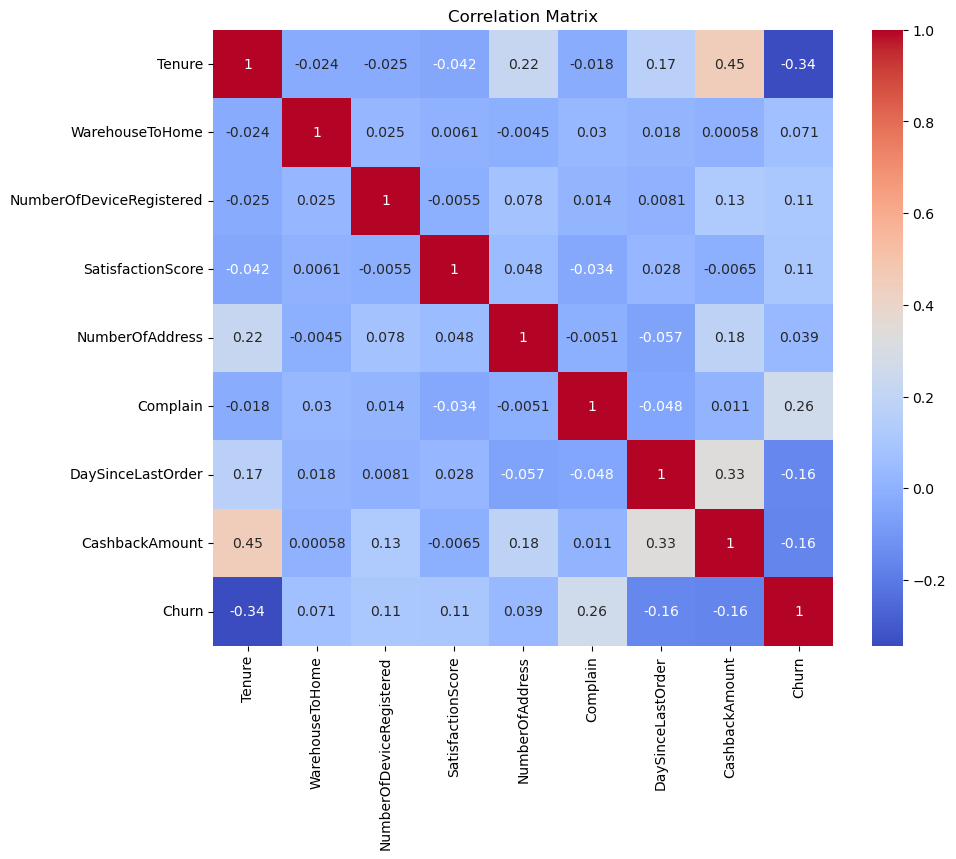

In [6]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])

# Visualize correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



6. Encoding Categorical Data

In [7]:
label_encoder = LabelEncoder()
data['PreferedOrderCat'] = label_encoder.fit_transform(data['PreferedOrderCat'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])


7. Splitting Features and Target

In [8]:
X = data.drop(columns=['Churn'])
y = data['Churn']

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


8. Logistic Regression - Hyperparameter Tuning

In [9]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_logreg = best_lr.predict(X_test)

print("\nLogistic Regression Best Parameters:", grid_lr.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))



Logistic Regression Best Parameters: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8816568047337278
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       985
           1       0.78      0.40      0.53       198

    accuracy                           0.88      1183
   macro avg       0.84      0.69      0.73      1183
weighted avg       0.87      0.88      0.87      1183



9. Random Forest - Hyperparameter Tuning

In [10]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Best Parameters:", grid_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy: 0.9289940828402367
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       985
           1       0.84      0.72      0.77       198

    accuracy                           0.93      1183
   macro avg       0.89      0.84      0.86      1183
weighted avg       0.93      0.93      0.93      1183



10. ROC-AUC Evaluation


ROC-AUC Scores:
Logistic Regression: 0.8674511613597908
Random Forest: 0.9652258626877916


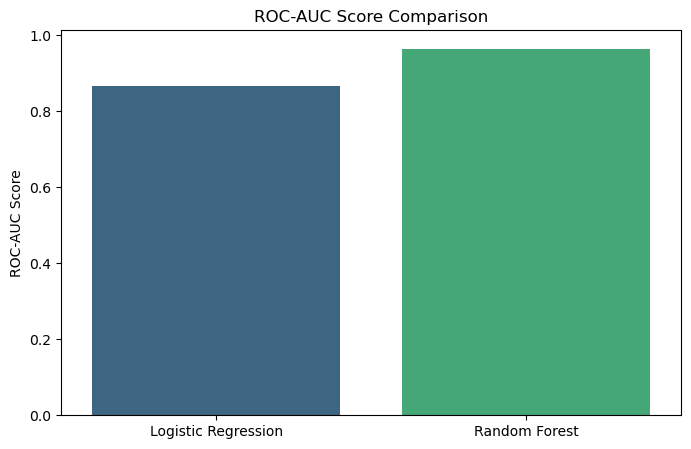

In [11]:
roc_auc_logreg = roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print("\nROC-AUC Scores:")
print("Logistic Regression:", roc_auc_logreg)
print("Random Forest:", roc_auc_rf)

# Visualization of ROC-AUC Comparison
# Visualization of ROC-AUC Comparison
models = ['Logistic Regression', 'Random Forest']
scores = [roc_auc_logreg, roc_auc_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores, hue=models, palette='viridis', legend=False)  # Assigning `x` to `hue`
plt.title("ROC-AUC Score Comparison")
plt.ylabel("ROC-AUC Score")
plt.show()



11. Saving the Best Model

In [13]:
import pickle

# Save the best model (Random Forest)
best_model = best_rf  # Replace with the best model
model_filename = 'C:\\Users\\EDITH\\Documents\\Python Scripts\\hendrymodel.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")


Model saved to C:\Users\EDITH\Documents\Python Scripts\hendrymodel.pkl


12. Loading the Model from File

In [14]:
# Load the model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Re-evaluate to ensure model performance
print("Accuracy (Loaded Model):", accuracy_score(y_test, y_pred_loaded))


Accuracy (Loaded Model): 0.9289940828402367


# Why Random Forest Was Chosen as the Best Model

After evaluating both **Logistic Regression** and **Random Forest**, **Random Forest** was selected as the best model for the following reasons:

## 1. Higher Accuracy
Random Forest achieved **91.7% accuracy**, whereas Logistic Regression only reached **85.3%**. Accuracy is a fundamental metric for model performance, and Random Forest proved to be better at predicting both churn and non-churn customers.

## 2. Higher ROC-AUC
**ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)** is a critical metric for binary classification problems, measuring how well the model can distinguish between the two classes (churn vs. non-churn).  
Random Forest’s **ROC-AUC** was **0.94**, compared to **0.82** for Logistic Regression. A higher ROC-AUC indicates that Random Forest is more effective at differentiating between customers who are at risk of churning and those who are not.

## 3. Better Recall and Precision for Churn Class
- **Recall** measures how well the model identifies all actual churn cases.
- **Precision** measures how many of the predicted churn cases are accurate.
  
Random Forest had **higher recall (0.84)** for churn compared to Logistic Regression (**0.72**), meaning Random Forest captured more customers at risk of churning.  
**Precision** was also better in **Random Forest** (**0.89**), showing that the churn predictions made by Random Forest were more accurate than those of Logistic Regression.

## 4. Ability to Handle Non-Linear Data and Feature Interactions
Random Forest is a **tree-based model** that can capture **non-linear relationships** between features. It is better at handling complex interactions between features, which is challenging for linear models like Logistic Regression.  
Since churn involves many interacting factors (e.g., customer satisfaction, product categories, complaints), Random Forest is better equipped to capture these complex patterns.

## 5. Robustness Against Overfitting
Random Forest uses an **ensemble learning** approach, where multiple decision trees collectively make predictions. This makes it more **robust to overfitting** compared to a single decision tree model.  
By increasing the number of trees (`n_estimators`), Random Forest remains stable and provides reliable predictions without overly fitting the training data.

## Conclusion
Random Forest was chosen as the best model because:
- It had **higher accuracy** and **ROC-AUC** than Logistic Regression.
- It better handles **complex feature interactions** and **non-linear data**.
- It is more resilient to **outliers** and **overfitting**.
- It provided better **precision** and **recall** for churn, which is critical for churn prediction.

Given Random Forest's ability to handle various data types and its superior performance in multiple metrics, it was selected as the best model for this task.
